In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/ML2

Mounted at /content/drive/
/content/drive/My Drive/ML2


In [ ]:
df = pd.read_csv('ML2data.csv')

# EDA

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,target,bathrooms_num,bathrooms_descr
0,8357,https://www.airbnb.com/rooms/8357,20220627154157,2022-06-27,The Mushroom Dome Retreat & LAND of Paradise S...,"Next available day is Aug. 28th, Next weekend:...",Even though we live only a 8 minute drive to A...,https://a0.muscache.com/pictures/miso/Hosting-...,24281.0,https://www.airbnb.com/users/show/24281,...,NaN,0,2.0,2.0,0.0,0.0,10.72,1.0,1,bath
1,11869,https://www.airbnb.com/rooms/11869,20220627154157,2022-06-27,Cottage by the Redwoods,This is a very private cute cozy small bohemia...,This is a quiet neighborhood with no street li...,https://a0.muscache.com/pictures/7d241088-9bfe...,44764.0,https://www.airbnb.com/users/show/44764,...,NaN,0,3.0,2.0,1.0,0.0,0.03,0.0,1,bath
2,11879,https://www.airbnb.com/rooms/11879,20220627154157,2022-06-27,Sunny room close to beach and parks,Sunny room in a cozy home with a 40 acre park ...,NaN,https://a0.muscache.com/pictures/5acb8501-4855...,44764.0,https://www.airbnb.com/users/show/44764,...,NaN,0,3.0,2.0,1.0,0.0,0.59,0.0,1,shared bath
3,24548,https://www.airbnb.com/rooms/24548,20220627154157,2022-06-27,Room with Private Entrance.,Bedroom and bath with private entrance in my h...,Great location close to Santa Cruz Harbor and ...,https://a0.muscache.com/pictures/cf8d43fd-90c1...,99532.0,https://www.airbnb.com/users/show/99532,...,NaN,0,1.0,0.0,1.0,0.0,3.47,1.0,1,private bath
4,31721,https://www.airbnb.com/rooms/31721,20220627154157,2022-06-27,Private Pleasure Point Beach Cottage w/hottub,*LOCATION LOCATION LOCATION* <br />Welcome to ...,I love everything about this neighborhood. I ...,https://a0.muscache.com/pictures/73aa203a-cb53...,136376.0,https://www.airbnb.com/users/show/136376,...,NaN,0,2.0,2.0,0.0,0.0,2.37,0.0,1,bath


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130540 entries, 0 to 131387
Data columns (total 76 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            130540 non-null  int64  
 1   listing_url                                   130540 non-null  object 
 2   scrape_id                                     130540 non-null  object 
 3   last_scraped                                  130540 non-null  object 
 4   name                                          130537 non-null  object 
 5   description                                   128647 non-null  object 
 6   neighborhood_overview                         80409 non-null   object 
 7   picture_url                                   130540 non-null  object 
 8   host_id                                       130540 non-null  float64
 9   host_url                                      13

In [ ]:
len(df)

131388

null imputation

In [ ]:
df.isna().sum()
#848 null values in target variable

id                                                  2
listing_url                                         1
scrape_id                                           1
last_scraped                                        1
name                                                3
                                                ...  
calculated_host_listings_count_entire_homes        18
calculated_host_listings_count_private_rooms       18
calculated_host_listings_count_shared_rooms        18
reviews_per_month                               25312
target                                            848
Length: 74, dtype: int64

In [ ]:
#drop 848 null target values
df = df.dropna(subset=['target'])

In [ ]:
# count number of occurrences of each category
cat_counts = df['target'].value_counts()

# calculate percentage of each category
cat_percents = cat_counts / len(df) * 100

print(cat_counts)
print(cat_percents)
#base count is 32% for superhosts

0.0    84945
1.0    45595
Name: target, dtype: int64
0.0    65.072009
1.0    34.927991
Name: target, dtype: float64


In [ ]:
#df1 = df.dropna(subset=['reviews_per_month'])

In [ ]:
#replace null values with mean
mean= df['reviews_per_month'].mean()
df['reviews_per_month'] = df['reviews_per_month'].fillna(mean)

In [ ]:
#extract numerical values from bathrooms_text
df['bathrooms_num'] = df['bathrooms_text'].str.extract(r'([\d\.]+)')
df['bathrooms_descr'] = df['bathrooms_text'].str.extract(r'([a-zA-Z ]+)')
#extract numerical values from price
df['price'] = df['price'].str.extract(r'([\d\.]+)')
df['price'] = df['price'].astype(float)

In [ ]:
df['bathrooms_num'] = df['bathrooms_num'].astype(float)
df['target'] = df['target'].astype(int)
df['id'] = df['id'].astype(int)

In [ ]:
# convert boolean column to numerical column
df['has_availability'] = df['has_availability'].map({'t': True, 'f': False})
df['has_availability'] = df['has_availability'].astype(int)
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].astype(int)
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False})
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype(int)

In [ ]:
# convert percentage column to float column
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float) / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float) / 100

feature selection

In [ ]:
# create df1 without string variables
df1 = df.select_dtypes(exclude='object')

In [ ]:
df1 = df1.drop(['bathrooms','calendar_updated'], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130540 entries, 0 to 131387
Data columns (total 38 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            130540 non-null  int64  
 1   host_id                                       130540 non-null  float64
 2   host_response_rate                            115027 non-null  float64
 3   host_acceptance_rate                          118958 non-null  float64
 4   host_listings_count                           130540 non-null  float64
 5   host_has_profile_pic                          130540 non-null  int64  
 6   latitude                                      130540 non-null  float64
 7   longitude                                     130540 non-null  float64
 8   accommodates                                  130540 non-null  float64
 9   beds                                          12

In [ ]:
df1.isna().sum()

id                                                  0
host_id                                             0
host_response_rate                              15513
host_acceptance_rate                            11582
host_listings_count                                 0
host_has_profile_pic                                0
latitude                                            0
longitude                                           0
accommodates                                        0
beds                                             1937
price                                               0
minimum_nights                                      0
minimum_minimum_nights                             17
maximum_minimum_nights                             17
minimum_maximum_nights                             17
maximum_nights_avg_ntm                             17
has_availability                                    0
availability_30                                     0
availability_60             

In [ ]:
df2 = df1.dropna()

In [ ]:
df2['review_scores_rating'].value_counts()

5.00    25044
4.88     2276
4.92     2168
4.83     2129
4.89     2128
        ...  
3.69        1
3.22        1
2.73        1
2.40        1
2.60        1
Name: review_scores_rating, Length: 183, dtype: int64

In [ ]:
# fill null values with mean for numerical columns
num_cols = df1.select_dtypes(include='float64').columns
df1[num_cols] = df1[num_cols].fillna(df1[num_cols].mean())

In [ ]:
df1 = df1[['id','host_response_rate','host_acceptance_rate','host_listings_count','accommodates','beds','price','bathrooms_num','minimum_nights',
           'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','has_availability','availability_365','number_of_reviews_ltm','number_of_reviews_l30d','review_scores_rating',
           'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
           'review_scores_value','instant_bookable','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
           'calculated_host_listings_count_shared_rooms','reviews_per_month','target']]

In [ ]:
# check duplicate rows
if df1.drop_duplicates().shape[0]==df1.shape[0]:
  print('No duplicate rows.') 
else:
  print('Dropped', df1.shape[0]-df1.drop_duplicates().shape[0],'duplicate rows.') 

Dropped 252 duplicate rows.


In [ ]:
  df1 = df1.drop_duplicates()

In [ ]:
len(df1)

130288

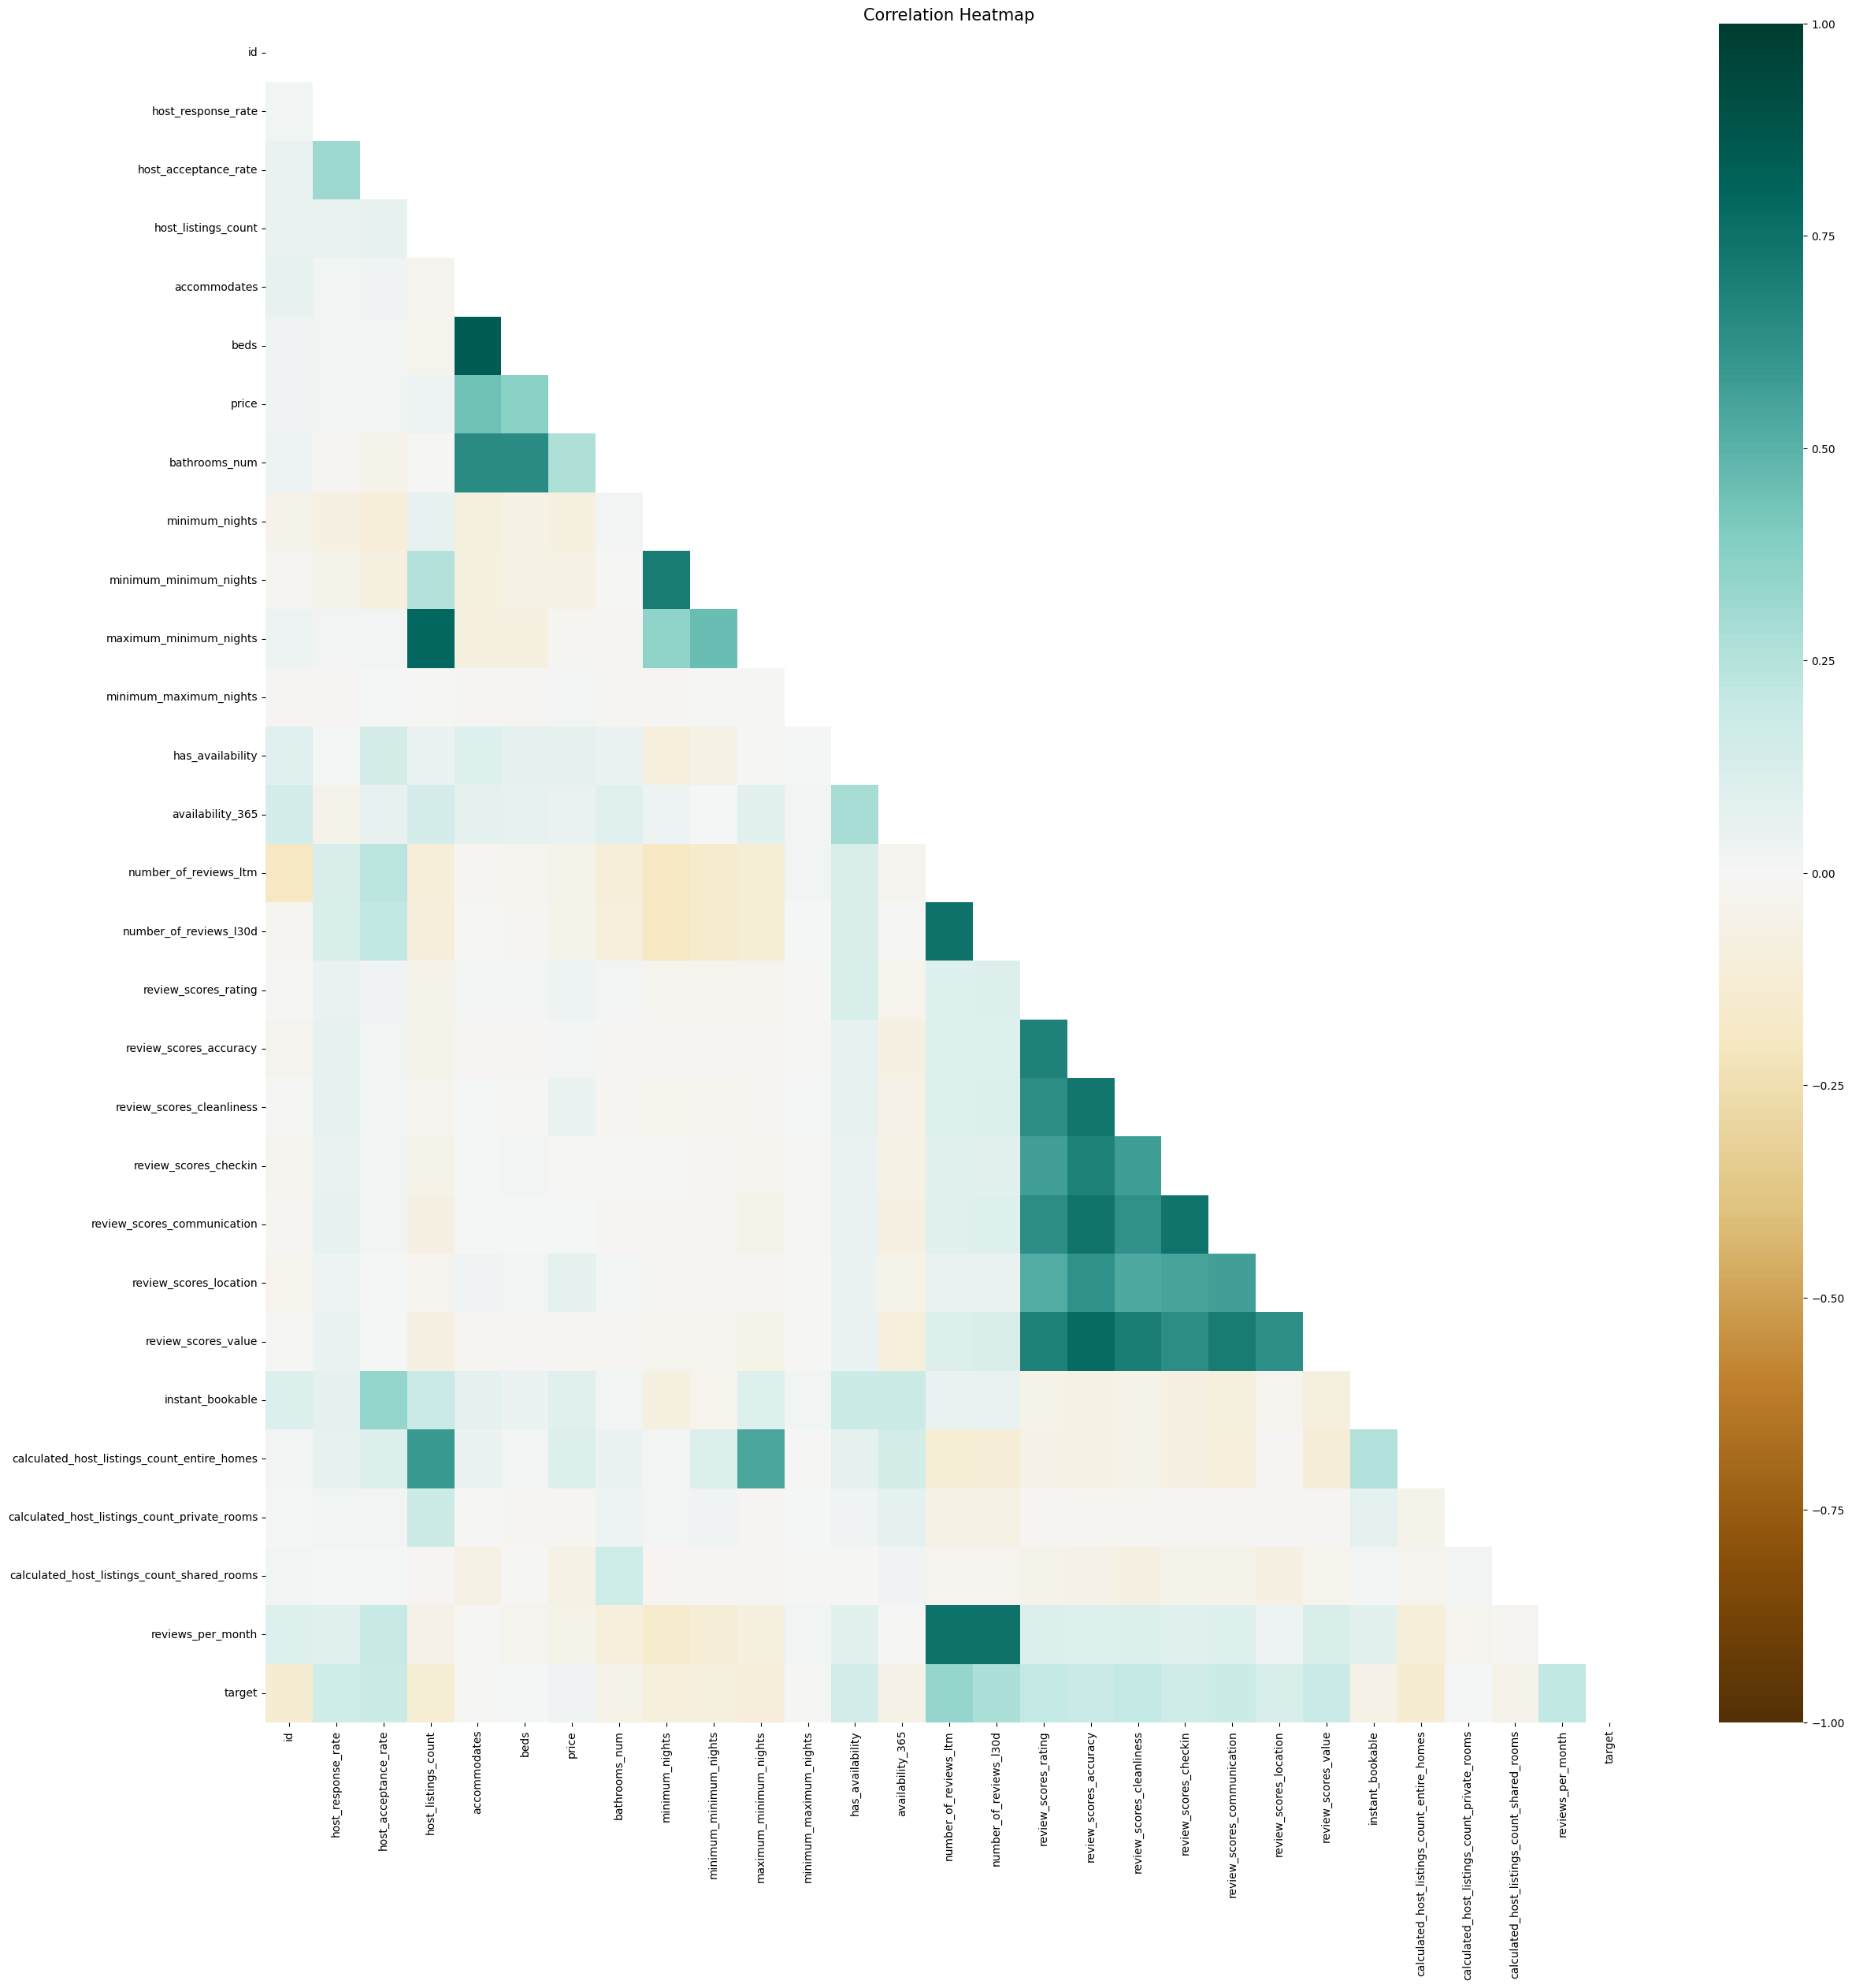

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# check multi-correlation
plt.figure(figsize=(28, 28))
mask = np.triu(np.ones_like(df1.corr(), dtype=np.bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=3);
#maximum_nights_avg_ntm, minimum_maximum_nights,availability_60, availability_30,availability_90,
#calculated_host_listings_count_entire_home,calculated_host_listings_count are multi correlated

In [ ]:
#df1.to_csv('airbnb_numerical.csv', index=False)

In [ ]:
from google.colab import files
#files.download('airbnb_numerical.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
# select 20 best features using chi-squared test
selector = SelectKBest(chi2, k=20)
selector.fit_transform(df1.drop('target', axis=1), df1['target'])
feature_names = df1.drop('target', axis=1).columns[selector.get_support()]
print(feature_names)
#not necessarily but can be used

Index(['host_acceptance_rate', 'host_listings_count', 'price', 'bathrooms_num',
       'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'availability_365', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


Data Normalization and Feature Selection

# Data Normalization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = df1.iloc[:,:28]
y = df1.iloc[:,28]

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_std = scaler.transform(X_train)
#X_test_std = scaler.transform(X_test)
#X_std = scaler.transform(X)

In [ ]:
#model evaluations on the test set
def model_evaluate(y_test, y_pred):
  print(f"Test F1 Score: {f1_score(y_test, y_pred)}")
  print(f"Test Precision Score: {precision_score(y_test, y_pred)}")
  print(f"Test Recall Score: {recall_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))
  print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

# Modeling

catboost

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=50,
                         depth=10,
                         learning_rate=0.4,
                         loss_function="Logloss",
                         verbose=False)

# Fit the model to the training data
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
# Evaluate the model on the testing data
print('Catboost Score')
model_evaluate(y_test, y_pred_clf)

Catboost Score
Test F1 Score: 0.8075211392968402
Test Precision Score: 0.8230269126096159
Test Recall Score: 0.7925888177053
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     25351
           1       0.82      0.79      0.81     13736

    accuracy                           0.87     39087
   macro avg       0.86      0.85      0.85     39087
weighted avg       0.87      0.87      0.87     39087

Confusion Matrix:
 [[23010  2341]
 [ 2849 10887]]


In [ ]:
! pip install shap
import shap

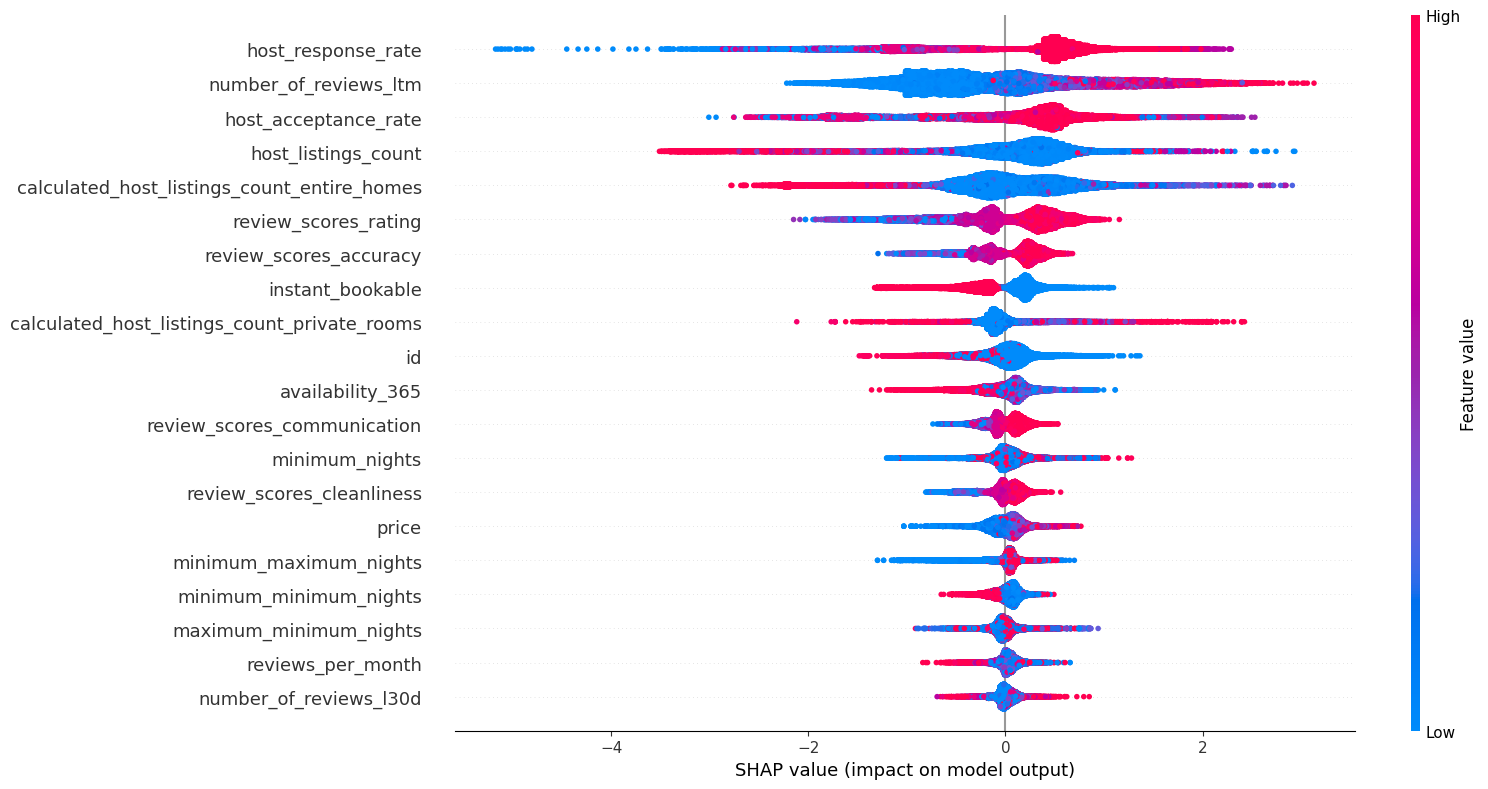

In [ ]:
import shap
explainer = shap.Explainer(clf)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(16,8))


for stacking model

In [ ]:
# make predictions on training and testing data
train_pred = clf.predict(X_train)
train_pred_prob = clf.predict_proba(X_train)[:,1]
test_pred = clf.predict(X_test)
test_pred_prob = clf.predict_proba(X_test)[:,1]

results_test = pd.DataFrame({'ID': X_test['id'],'test_target': y_test, 'test_pred': test_pred, 'test_pred_prob': test_pred_prob})
results_test.to_csv('numericals_test.csv', index=False)
from google.colab import files
files.download('numericals_test.csv')

In [ ]:
results_train = pd.DataFrame({'ID': X_train['id'],'train_target': y_train, 'train_pred': train_pred, 'train_pred_prob': train_pred_prob})
# output results to CSV file
results_train.to_csv('numericals_train.csv', index=False)
from google.colab import files
files.download('numericals_train.csv')

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Performance of Decision Tree Classification:')
model_evaluate(y_test, y_pred_dt)

Performance of Decision Tree Classification:
Test F1 Score: 0.7133022429491449
Test Precision Score: 0.712511091393079
Test Recall Score: 0.7140951534015118
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     25114
           1       0.71      0.71      0.71     13494

    accuracy                           0.80     38608
   macro avg       0.78      0.78      0.78     38608
weighted avg       0.80      0.80      0.80     38608

Confusion Matrix:
 [[21226  3888]
 [ 3858  9636]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Build a decision tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
print('Decision Tree Score:')
model_evaluate(y_test, y_pred_tree)

Decision Tree Score:
Test F1 Score: 0.7179543378995435
Test Precision Score: 0.7205073685754088
Test Recall Score: 0.7154193360512522
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     25351
           1       0.72      0.72      0.72     13736

    accuracy                           0.80     39087
   macro avg       0.78      0.78      0.78     39087
weighted avg       0.80      0.80      0.80     39087

Confusion Matrix:
 [[21539  3812]
 [ 3909  9827]]


In [ ]:
from sklearn.model_selection import GridSearchCV
#parameter tuning
tree_params = {
    'criterion': ['entropy','gini'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[10,20,30,40],
    'min_samples_leaf':[15,20,25,30],
    'max_features':[1,2,3,4,5,6,7,8,9,10]
}
tree_gs = GridSearchCV(decision_tree,tree_params, cv=5, scoring='precision')
tree_gs = tree_gs.fit(X_train,y_train)
y_pred_tree_gs = tree_gs.predict(X_test)
print("Optimal Parameter:", tree_gs.best_params_)
print('Decision Tree Score:')
model_evaluate(y_test, y_pred_tree_gs)

In [ ]:
from sklearn.model_selection import GridSearchCV
#parameter tuning
tree_params = {
    'criterion': ['entropy','gini'],
    'max_depth':[6,7,8,9,10,15,20,25,30],
    'min_samples_split':[10,20,30,40,50,60],
    'min_samples_leaf':[10,15,20,25],
    'max_features':[6,7,8,9,10,15,20,25,30]
}
tree_gs = GridSearchCV(decision_tree,tree_params, cv=5, scoring='precision')
tree_gs = tree_gs.fit(X_train,y_train)
y_pred_tree_gs = tree_gs.predict(X_test)
print("Optimal Parameter:", tree_gs.best_params_)
print('Decision Tree Score:')
model_evaluate(y_test, y_pred_tree_gs)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Build a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)[:,1] # probabilities
y_pred_lr = np.where(y_pred_prob>0.2, 1, 0)
print('Logistic Regression Score:')
model_evaluate(y_test, y_pred_lr)

Logistic Regression Score:
Test F1 Score: 0.520076481835564
Test Precision Score: 0.35142118863049093
Test Recall Score: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     25351
           1       0.35      1.00      0.52     13736

    accuracy                           0.35     39087
   macro avg       0.18      0.50      0.26     39087
weighted avg       0.12      0.35      0.18     39087

Confusion Matrix:
 [[    0 25351]
 [    0 13736]]


In [ ]:
print(y_pred_lr)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01,0.1,1,1e2,1e3],
    'max_iter': [20,50, 100, 150],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],                                      
}
lr = LogisticRegression(random_state=42)
lr_gs = GridSearchCV(lr, lr_params, cv=5, scoring='precision')
lr_gs = lr_gs.fit(X_train, y_train)
y_pred_lr_gs = lr_gs.predict(X_test)
print("Optimal Parameter:", lr_gs.best_params_)
print('Performance of Logistic Regression:')
model_evaluate(y_test, y_pred_lr_gs)

Naïve Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(force_alpha=True)
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print('Performance of Naive Bayes Classification:')
model_evaluate(y_test, y_pred_nb)

Performance of Naive Bayes Classification:
Test F1 Score: 0.5482085258477901
Test Precision Score: 0.39122184894861267
Test Recall Score: 0.9156231799650554
              precision    recall  f1-score   support

           0       0.83      0.23      0.36     25351
           1       0.39      0.92      0.55     13736

    accuracy                           0.47     39087
   macro avg       0.61      0.57      0.45     39087
weighted avg       0.68      0.47      0.42     39087

Confusion Matrix:
 [[ 5780 19571]
 [ 1159 12577]]


# Model Evaluation

ROC of CatBoost

AUC score: 0.9406992654809643


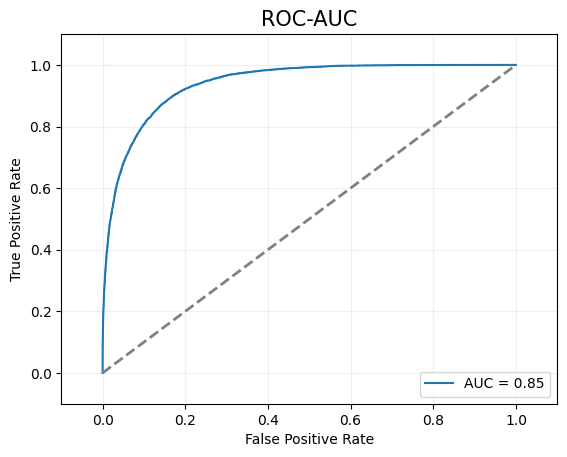

In [ ]:
def plot_roc_curve(true_y, y_prob):
  fpr, tpr, thresholds = roc_curve(true_y, y_prob)
  plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc_score(true_y, y_prob))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-AUC',fontsize=15)
  plt.legend(loc='lower right')
  plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
  
  plt.xlim([-0.1, 1.1])  #limits for x axis
  plt.ylim([-0.1, 1.1])  #limits for y axis
  plt.grid(alpha=0.2)

plot_roc_curve(y_test, clf.predict_proba(X_test)[:,1])
print(f'AUC score: {roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])}')